<a href="https://colab.research.google.com/github/ObiDaniel/ObiDaniel/blob/main/Car_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Information

Evaluating Cars to determine the Buyability of it

****

Can you accurately predict the cars' evaluation?

 Source: Kaggle

#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Import Datasets

In [ ]:
car_df= pd.read_csv('car_evaluation.csv')
car_df

,buying,maintenance,no_of_doors,no_of_persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [ ]:
car_df.shape

(1727, 7)

In [ ]:
car_df.outcome.value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: outcome, dtype: int64

In [ ]:
car_df.buying.value_counts()

med      432
high     432
low      432
vhigh    431
Name: buying, dtype: int64

In [ ]:
#Statistical information
car_df.describe()

,buying,maintenance,no_of_doors,no_of_persons,lug_boot,safety,outcome
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,med,med,4,4,big,med,unacc
freq,432,432,432,576,576,576,1209


In [ ]:
#datatypes of the dataset attributes

car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   buying         1727 non-null   object
 1   maintenance    1727 non-null   object
 2   no_of_doors    1727 non-null   object
 3   no_of_persons  1727 non-null   object
 4   lug_boot       1727 non-null   object
 5   safety         1727 non-null   object
 6   outcome        1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


#Data Preprocessing

In [ ]:
#Check for null values

car_df.isnull().sum()

buying           0
maintenance      0
no_of_doors      0
no_of_persons    0
lug_boot         0
safety           0
outcome          0
dtype: int64

#PERFORM SOME EXPLORATORY DATA ANALYSIS(EDA)

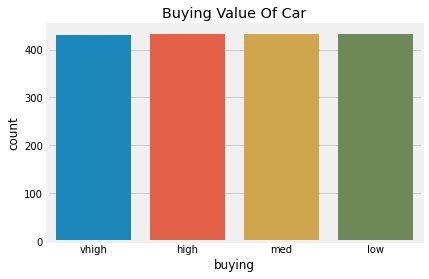

In [ ]:
#Categorical attributes visualization

sns.countplot(car_df['buying'])
plt.title('Buying Value Of Car')
plt.show()

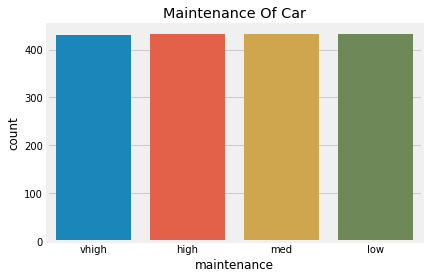

In [ ]:
sns.countplot(car_df['maintenance'])
plt.title('Maintenance Of Car')
plt.show()

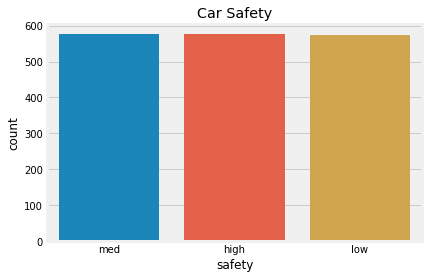

In [ ]:
sns.countplot(car_df['safety'])
plt.title('Car Safety')
plt.show()

In [ ]:
#Input Split

X = car_df.iloc[:,:-1]
y = car_df.outcome
X.head()

,buying,maintenance,no_of_doors,no_of_persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high


In [ ]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: outcome, Length: 1727, dtype: object

In [ ]:
#Label encoding

from sklearn.preprocessing import LabelEncoder
cols = ['buying','maintenance','no_of_doors','no_of_persons','lug_boot','safety']
le = LabelEncoder()
for col in cols:
    X[col] = le.fit_transform(X[col])

In [ ]:
X

,buying,maintenance,no_of_doors,no_of_persons,lug_boot,safety
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0
...,...,...,...,...,...,...
1722,1,1,3,2,1,2
1723,1,1,3,2,1,0
1724,1,1,3,2,0,1
1725,1,1,3,2,0,2


#Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

#Training the KNN model on the Training set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=classifier.predict(X_test)
print(accuracy_score(y_test,y_pred))
pd.crosstab(y_test,y_pred)

0.9075144508670521


col_0,acc,good,unacc,vgood
outcome,,,,
acc,94,2,27,0
good,8,8,0,0
unacc,1,0,357,0
vgood,7,2,1,12


In [ ]:
94/123

0.7642276422764228

#Training the Random Forest Classification model on the Training set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=classifier.predict(X_test)
print(accuracy_score(y_test,y_pred))
pd.crosstab(y_test,y_pred)

0.9344894026974951


col_0,acc,good,unacc,vgood
outcome,,,,
acc,112,4,6,1
good,7,9,0,0
unacc,11,0,347,0
vgood,5,0,0,17


In [ ]:
#APPLYING SMOTE(Synthetic Minority Oversampling Technique) HERE TO SEE IF IT IMPROVES THE DATASET/
#COS ITSEEMS THE DATASET IS IMBALANCED

from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)
#X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)

In [ ]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({'unacc': 851, 'acc': 261, 'good': 53, 'vgood': 43})
After SMOTE : Counter({'unacc': 851, 'acc': 851, 'good': 851, 'vgood': 851})


In [ ]:
classifier.fit(X_train_smote,y_train_smote)
y_pred= classifier.predict(X_test)
print(accuracy_score(y_test,y_pred))
pd.crosstab(y_test,y_pred)

0.9460500963391136


col_0,acc,good,unacc,vgood
outcome,,,,
acc,117,2,4,0
good,2,14,0,0
unacc,14,0,344,0
vgood,6,0,0,16


####Applying SMOTE did not really influence outcomes but it's good we applied it anyway..